# Métodos inciais - Reconhecimento Biométrico das Mãos

In [152]:
import numpy as np 
import imageio
import math
import matplotlib.pyplot as plt

Carrega a imagem a ser reconhecida por biometria

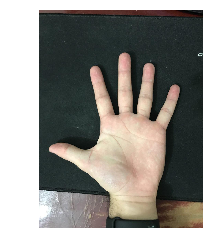

In [164]:
image = imageio.imread("handDatabase/person001_001.jpg")
plt.axis('off')
plt.imshow(image)
plt.show()

Implementa as funções para cálculo de variáveis utilizadas no algoritmo de Otsu

In [165]:
# Calculates a weigh for a class
def weigh(M, x1, x2, hist):
	return (1/M)*np.sum(hist[x1:x2])

# Calculates mean for a class
def mean(x1, x2, hist):

	a = 0 

	for i in range(x1, x2):
		a = a+(i*hist[i])

	if np.sum(hist[x1:x2]) != 0:
		return a/(np.sum(hist[x1:x2]))
	else: 
		return 0

# Calculates variance for a class
def variance(x1, x2, mean, hist):

	a = 0

	for i in range(x1, x2):
		a = a+(math.pow(i-mean, 2)*hist[i])

	if np.sum(hist[x1:x2]) != 0:
		return a/(np.sum(hist[x1:x2]))
	else: 
		return 0

Transformação da imagem RGB para escala de cinza

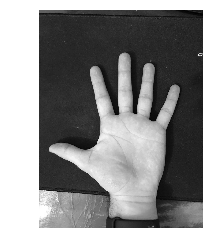

In [166]:
def grayTransform(img):
	return np.dot(img, [0.299, 0.587, 0.114])

gray = grayTransform(image).astype(int)

plt.axis('off')
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

Implementação do algoritmo de Otsu, que detecta automaticamente o melhor thresholding a ser utilizado na imagem para conversão da imagem para binário

In [167]:
def otsuThresholding(img):

	# Computing histogram
	hist, bin_edges = np.histogram(img, bins='auto');
	# Converts array with edges to int
	bin_edges = bin_edges.astype(int)

	# New array to histogram
	histogram = np.zeros(255)

	# Fills new histogram
	for x in range(hist.size):
		histogram[bin_edges[x]] = hist[x]

	# Converts to int
	histogram = histogram.astype(int)

	intraclassVar = np.zeros(histogram.size)

	# Intra-class variance for each intensity
	for L in range(histogram.size):
		
		# Weigh for class A, sum of frequencies from 0 to L-1
		weighA = weigh(img.shape[0]*img.shape[1], 0, L, histogram)
		# Mean for class A
		meanA = mean(0, L+1, histogram)
		# Variance for class A
		varA = variance(0, L+1, meanA, histogram)

		# Weigh for class B, sum of frequencies from L to last item
		weighB = weigh(img.shape[0]*img.shape[1], L, histogram.size, histogram)
		# Mean for class B
		meanB = mean(L, histogram.size, histogram)
		# Variance for class B
		varB = variance(L, histogram.size, meanB, histogram)
		
		# Stores intraclass variance calculated
		intraclassVar[L] = weighA*varA + weighB*varB

		# Set the min value 
		if L is 0:
			minValue = intraclassVar[L]
		elif L != 0 and minValue > intraclassVar[L]: 
			minValue = intraclassVar[L] 

	# Returns the optimal thresholding
	return list(intraclassVar).index(minValue)

thresholding = otsuThresholding(gray)

Realiza a conversão da imagem para binário utilizando o thresholding obtido

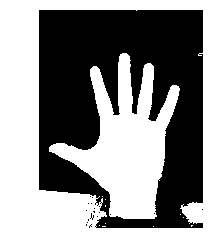

In [168]:
def binaryTransform(img, thresholding):

	binImg = np.zeros(img.shape)

	# Sets image values according to chosen thresholding
	for x in range(img.shape[0]):
		for y in range(img.shape[1]):
			if img[x,y] > thresholding: binImg[x,y] = 1

	plt.axis('off')
	plt.imshow(binImg, cmap=plt.get_cmap('gray'))
	plt.show()

	return binImg

binImg = binaryTransform(gray, thresholding)

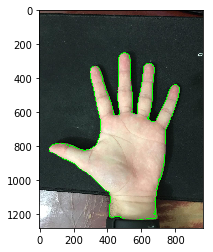

Image([[[116,  88,  84],
        [116,  88,  84],
        [116,  88,  84],
        ...,
        [ 25,  26,  28],
        [ 23,  24,  26],
        [ 24,  25,  27]],

       [[116,  88,  84],
        [116,  88,  84],
        [117,  89,  85],
        ...,
        [ 27,  28,  30],
        [ 28,  29,  31],
        [ 29,  30,  32]],

       [[117,  88,  84],
        [118,  89,  85],
        [118,  89,  85],
        ...,
        [ 28,  29,  31],
        [ 29,  30,  32],
        [ 31,  32,  34]],

       ...,

       [[159, 158, 164],
        [161, 160, 166],
        [163, 162, 168],
        ...,
        [118,  69,  52],
        [116,  67,  50],
        [114,  65,  48]],

       [[165, 164, 170],
        [168, 167, 173],
        [172, 171, 177],
        ...,
        [119,  70,  53],
        [117,  68,  51],
        [115,  66,  49]],

       [[174, 173, 179],
        [178, 177, 183],
        [183, 182, 188],
        ...,
        [121,  72,  55],
        [119,  70,  53],
        [117,  68,  51]]

In [230]:
import cv2

#Ignore por enquanto. Não sei se vamos precisar
# def openClose(binImg, shape=(5,5)):
#     binary = binImg.astype(np.uint8)
    
#     #using morphological close and open for noise reduction
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,shape)
#     binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
#     binary = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
#     return binary

def edgeDetection(binImg, image):

    binary = binImg.astype(np.uint8)

    
    # Reads the binary image
    img = image.astype(np.uint8)
    
    # Finding contours
    im2, contours, hierarchy = cv2.findContours(binary,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    new_contours = []
    for c in contours:
        if cv2.contourArea(c) > 100000:
            new_contours.append(c)
            
    # Drawing the contour in the original image
    cv2.drawContours(img, new_contours, -1, (0,255,0), 3)
    
    # Plots image with contours
    plt.imshow(img)
    plt.show()
    
    return img

edgeDetection(binImg, image)